INSTALLING LIBRARIES USED OUTSIDE OF THE COURSE

In [ ]:
pip install pandas_profiling

IMPORTING REQUIRED LIBRARIES

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

READING THE DATASET

In [42]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv', index_col= 'item_id')
print(df.shape)
df.head()

/var/folders/6x/x28m3jzd06j_bj9ttbhj9c100000gn/T/ipykernel_44766/1121340002.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv', index_col= 'item_id')


(1048575, 25)


status created_at  \
item_id                               
211131.0        complete   7/1/2016   
211133.0        canceled   7/1/2016   
211134.0        canceled   7/1/2016   
211135.0        complete   7/1/2016   
211136.0  order_refunded   7/1/2016   

                                                        sku   price  \
item_id                                                               
211131.0                                  kreations_YI 06-L  1950.0   
211133.0  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
211134.0                                 Ego_UP0017-999-MR0  2450.0   
211135.0                                     kcc_krone deal   360.0   
211136.0                                        BK7010400AG   555.0   

          qty_ordered  grand_total increment_id    category_name_1  \
item_id                                                              
211131.0          1.0       1950.0    100147443    Women's Fashion   
211133.0          1.0        240.0    100147444  Beauty & Grooming   
211134.0          1.0       2450.0    100147445    Women's Fashion   
211135.0          1.0         60.0    100147446  Beauty & Grooming   
211136.0          2.0       1110.0    100147447            Soghaat   

         sales_commission_code  discount_amount  ... Month Customer Since  \
item_id                                          ...                        
211131.0                    \N              0.0  ...   7.0         2016-7   
211133.0                    \N              0.0  ...   7.0         2016-7   
211134.0                    \N              0.0  ...   7.0         2016-7   
211135.0           R-FSD-52352            300.0  ...   7.0         2016-7   
211136.0                    \N              0.0  ...   7.0         2016-7   

             M-Y    FY  Customer ID  Unnamed: 21 Unnamed: 22 Unnamed: 23  \
item_id                                                                    
211131.0  7-2016  FY17          1.0          NaN         NaN         NaN   
211133.0  7-2016  FY17          2.0          NaN         NaN         NaN   
211134.0  7-2016  FY17          3.0          NaN         NaN         NaN   
211135.0  7-2016  FY17          4.0          NaN         NaN         NaN   
211136.0  7-2016  FY17          5.0          NaN         NaN         NaN   

         Unnamed: 24  Unnamed: 25  
item_id                            
211131.0         NaN          NaN  
211133.0         NaN          NaN  
211134.0         NaN          NaN  
211135.0         NaN          NaN  
211136.0         NaN          NaN  

[5 rows x 25 columns]

CREATING A REPORT ON THE DATASET

In [43]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CLEANING THE DATASET

In [44]:
df.drop(df.iloc[:,20:], inplace = True, axis = 1)
df.drop(['sales_commission_code','increment_id','M-Y','sku','FY','BI Status','Working Date',' MV ','Customer Since','Customer ID'], inplace = True, axis = 1)
df.dropna(inplace = True)
df.rename(columns = {'created_at':'Order_Date','qty_ordered':'Quantity','price':'Unit_Price','grand_total':'Total_Price','category_name_1':'Category','discount_amount':'Discount','status':'Status','payment_method':'Payment_Mode'}, inplace = True)
df.Order_Date = pd.to_datetime(df.Order_Date)
df.Month = df.Month.astype('int64')
df.Year = df.Year.astype('int64')
df.Quantity = df.Quantity.astype('int64')
df.index = df.index.astype('int64')
df.index.name = 'Order_id'


CHANGING ROW NAMES FOR EFFECTIVE ANALYSIS

In [45]:
df['Payment_Mode'].replace(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'],['COD','Card','Card','Credit_Points','COD','Card','Card','Other','Credit_Points','Other','Other','Credit_Points','Card','EasyPay','EasyPay','EasyPay','Card','Other'],inplace = True)


df['Status'].replace(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
                     ['Complete', 'Canceled', 'Refunded', 'Processing', 'Refunded','Complete','Fraud','Hold','Exchange','Processing','Complete','0','Complete','Processing','Processing','Complete'], inplace = True)

df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)
df.drop(df[df.Status == '0'].index, inplace = True) #dropping rows with status '\\N'
df.drop(df[df.Category == '\\N'].index, inplace = True) #dropping rows with category '\\N'


EXPLORATORY DATA ANALYSIS

In [46]:
complete_df = df[df['Status'] == 'Complete'] #creating a new dataframe with only complete orders for EDA
sns.set_style('darkgrid')

WHICH CATEGORY IS THE MOST SOLD?

41965

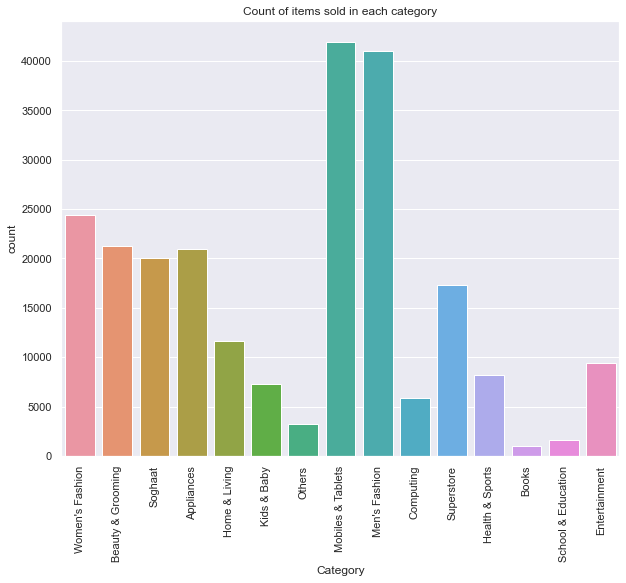

In [47]:
sns.countplot(x = complete_df['Category'], data = complete_df)
plt.xticks(rotation = 90)
plt.title('Count of items sold in each category')
max_category = max(complete_df['Category'].value_counts())
max_category

THE GRAPH ABOVE CLEARLY SHOWS THAT THE MOST SOLD CATEGORY IS MOBILE & TABLETS FOR WHICH 41965 ITEMS WERE SOLD WITH MEN'S FASHION IN SECOND.

WHICH PAYMENT MODE IS THE MOST USED?

268234

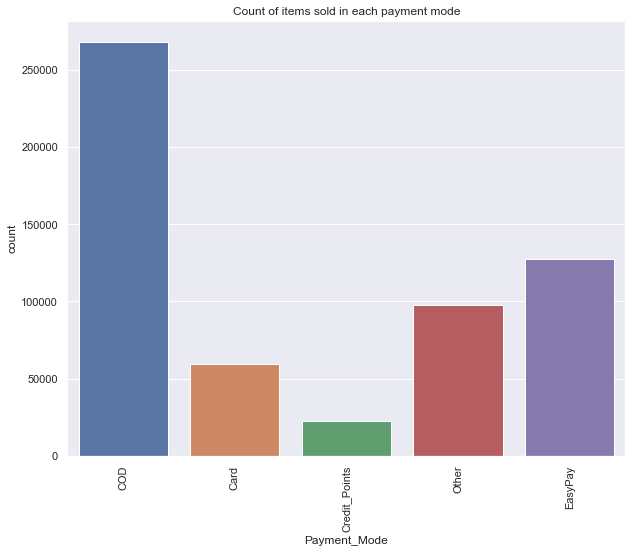

In [48]:
sns.countplot(x = df['Payment_Mode'])
plt.xticks(rotation = 90)
plt.title('Count of items sold in each payment mode')
max_category = max(df['Payment_Mode'].value_counts())
max_category

THE GRAPH ABOVE CLEARLY SHOWS THAT THE MOST USED MODE OF PAYMENT, WITH A BIG MARGIN, IS CASH ON DELIVERY THROUGH WHICH 268234 ITEMS WERE SOLD WITH EASYPAY IN SECOND.

IDENTIFYING TOP CATEGORIES WITH RESPECT TO SALES VOLUME

Text(0.5, 1.0, 'Sales volume by category')

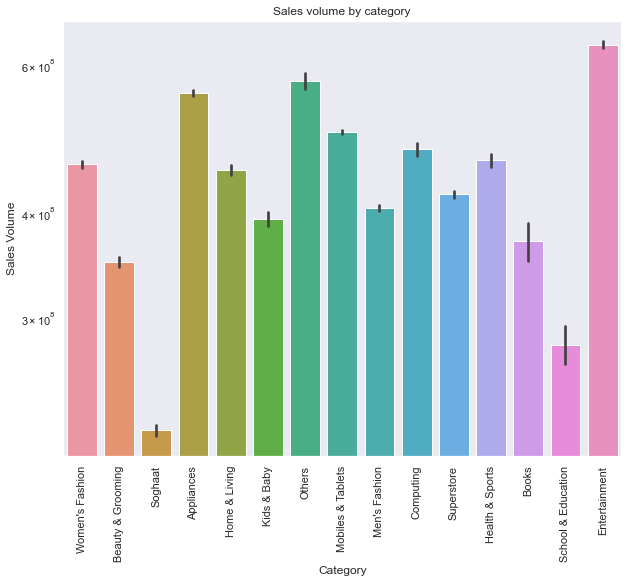

In [49]:
sns.barplot(x = complete_df['Category'], y = np.cumsum(complete_df['Total_Price']))
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylabel('Sales Volume')
plt.title('Sales volume by category')

THE GRAPH SHOWS THAT THE CATEGORY WITH THE HIGHEST SALES VOLUME IS ENTERTAINMENT FOLLOWED CLOSELY BY 'OTHER' CATEGORY AND APPLIANCES.

DO CUSTOMERS ACTUALLY COMPLETE THEIR ORDERS? DO THEY CANCEL THEM OR ARE THEY DOING FRAUDS?

Text(0.5, 1.0, 'Count of different order status')

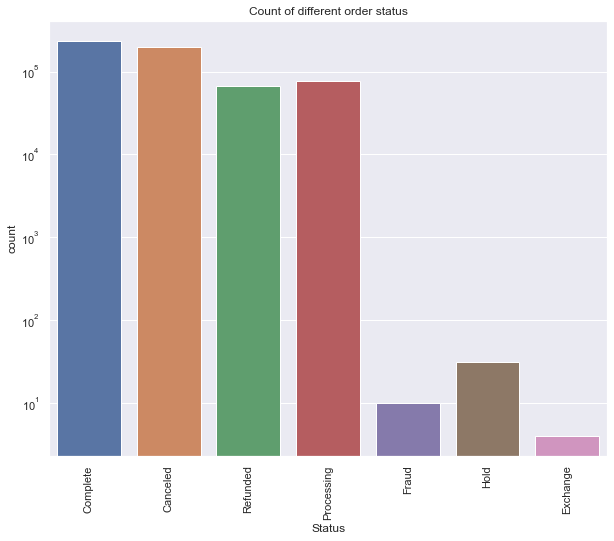

In [50]:
sns.countplot(x = df['Status'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.title('Count of different order status')

THE GRAPH SHOWS THAT THE MOST ORDERS ARE COMPLETED FOLLOWED CLOSELY BY CANCELLATION, PROCESSING AND REFUNDS.
THE COUNT OF THE STATUS OF FRAUD, EXCHANGE AND HOLD IS VERY LESS AS COMPARED TO THE OTHER FOUR.

THE GRAPH SHOWS THAT THE MOST ORDERS WERE PLACED IN 2017 WITH THE COUNT OF 288898 FOLLOWED BY 2018 AND 2016.

WHAT IS THE MOST FREQUENT ORDER STATUS ON DIFFERENT MODES OF PAYMENT?

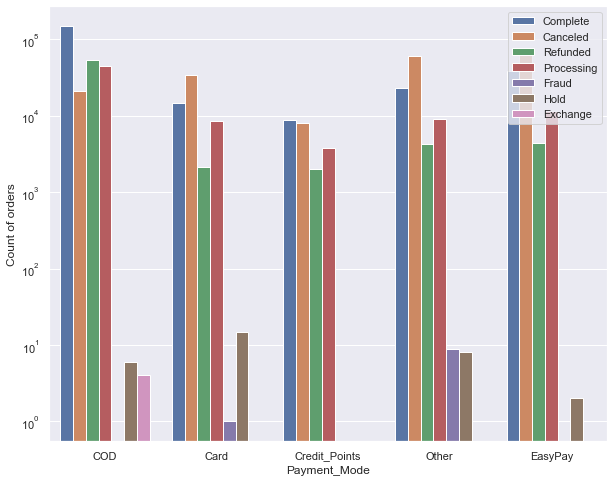

In [51]:
sns.countplot(x = df['Payment_Mode'], hue = df['Status'])
plt.yscale('log')
plt.ylabel('Count of orders')
plt.legend(loc = 'best')

THE GRAPH SHOWS THAT FOR CASH ON DELIVERY, THE MOST FREQUENT ORDER STATUS IS COMPLETED.
FOR CARD PAYMENT, THE MOST FREQUENT ORDER STATUS IS CANCELLED.
FOR CREDIT_POINTS, THE MOST FREQUENT ORDER STATUS IS COMPLETED FOLLOWED EXTREMELY CLOSELY BY CANCELLED.
FOR EASYPAY, THE MOST FREQUENT ORDER STATUS IS CANCELLED.
FOR OTHER MODES OF PAYMENTS, THE MOST FREQUENT ORDER STATUS IS CANCELLED.

WITH RESPECT TO PRICE, WHICH PAYMENT METHOD IS USED THE MOST?

Text(0.5, 1.0, 'Total Price of items sold through each Payment Mode')

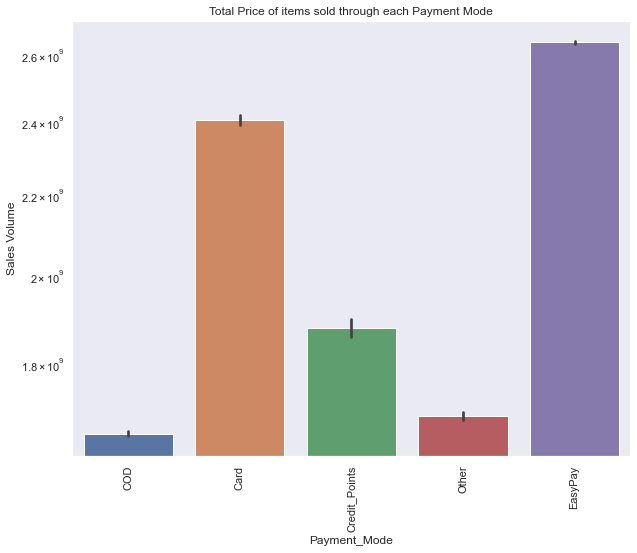

In [52]:
sns.barplot(x = df['Payment_Mode'], y = np.cumsum(df['Total_Price']))
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylabel('Sales Volume')
plt.title('Total Price of items sold through each Payment Mode')

THE GRAPH SHOWS THAT THE ORDERS WITH GENERALLY HIGH PRICE ARE PLACED THROUGH EASYPAY AND CARD.
THE ORDERS WITH GENERALLY LOW PRICES ARE PLACED THROUGH CASH ON DELIVERY.

COUNT OF ORDERS WITH RESPECT TO MONTHS

Nov    83829
May    34414
Aug    24883
Apr    21499
Jun    19525
Mar    19307
Jul    19119
Oct    17496
Dec    15733
Jan    12852
Feb    11658
Sep     8583
Name: Month, dtype: int64

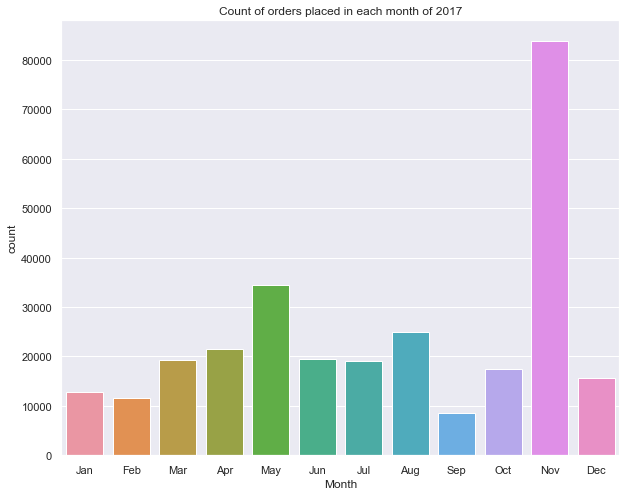

In [53]:

x_df = df[df['Year'] == 2017] #creating a new dataframe with only 2017 data for this specific analysis as month wise analysis is only possible for 2017
sns.countplot(x = x_df['Month'])
plt.title('Count of orders placed in each month of 2017')
x_df.Month.value_counts()

THE GRAPH SHOWS THAT THE MONTH OF NOVEMBER HAS THE HIGHEST COUNT OF ORDERS WHEREAS THE MONTH OF SEPTEMBER HAS THE LOWEST COUNT OF ORDERS.

SALES VOLUME BY MONTH IN 2017

Text(0.5, 1.0, 'Sales volume by month in 2017')

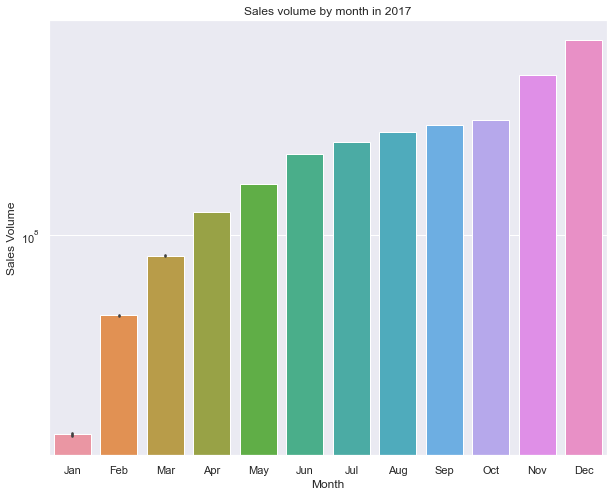

In [54]:
x1_df = x_df[x_df['Status'] == 'Complete'] #creating a new dataframe with only complete orders for EDA for the year 2017
sns.barplot(x = x1_df['Month'],  y = np.cumsum(x1_df['Total_Price']))
plt.yscale('log')
plt.ylabel('Sales Volume')
plt.title('Sales volume by month in 2017')

THE GRAPH ABOVE SHOWS THAT DECEMBER OF 2017 HAD THE HIGHEST SALES VOLUME WHEREAS JANUARY OF 2017 HAD THE LOWEST SALES VOLUME.

WHICH CATEGORY HAS THE HIGHEST OVERALL DISCOUNT?

Text(0, 0.5, 'Discount')

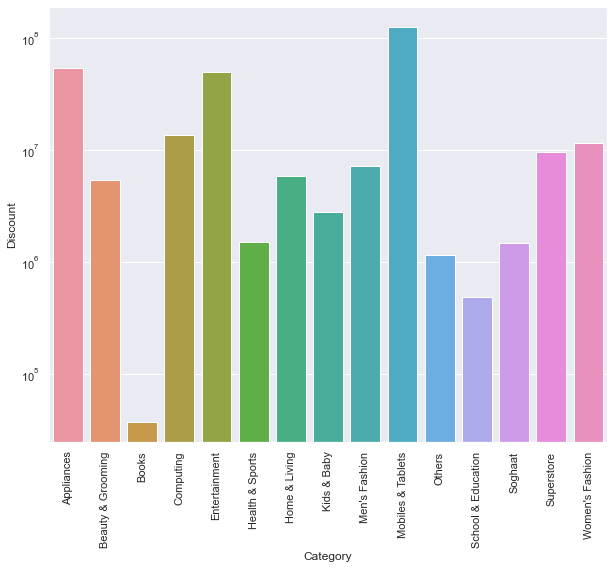

In [55]:
x = df.groupby('Category')['Discount'].sum()
sns.barplot(x = x.index, y = x.values)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylabel('Discount')

THE GRAPH SHOWS THAT THE CATEGORY WITH THE HIGHEST OVERALL DISCOUNT IS MOBILE & TABLETS FOLLOWED BY APPLIANCES AND ENTERTAINMENT.

CORRELATION HEATMAP FOR THE DATASET

<AxesSubplot:>

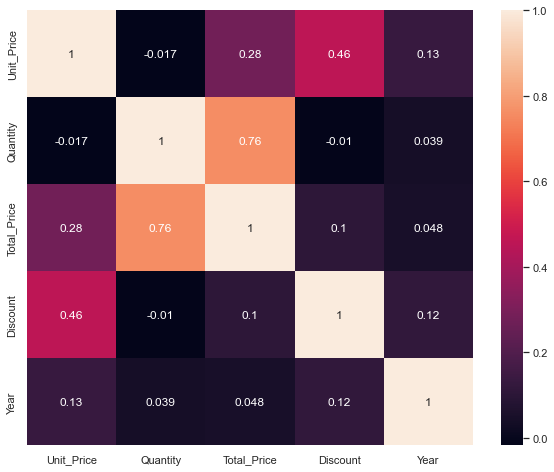

In [56]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(), annot = True)

THE ABOVE HEATMAP CONTAINS CORRELATIONS BETWEEN EVERY NUMERICAL FEATURE IN THIS DATASET.
THE CORRELATION BETWEEN UNIT PRICE AND DISCOUNT IS 0.46. THIS MAKES SENSE AS THE DISCOUNT IS GIVEN ON THE UNIT PRICE, SO THE HIGHER THE UNIT PRICE, THE HIGHER THE DISCOUNT.
THE SECOND OBSERVATION IS BETWEEN QUANTITY AND TOTAL PRICE WHICH HAVE A CORRELATION OF 0.76 WHICH IS THE HIGHEST CORRELATION IN THIS DATASET. THIS ALSO MAKES SENSE AS THE TOTAL PRICE IS THE PRODUCT OF QUANTITY AND UNIT PRICE, SO THE LARGER THE QUANITY, THE HIGHER THE TOTAL PRICE.
ANOTHER OBSERVATION IS BETWEEN QUANTITY AND UNIT PRICE WHICH HAVE A CORRELATION OF ALMOST 0 WHICH MAKES SENSE AS THE QUANITY CAN GO UP BUT THE UNIT PRICE WILL ALWAYS REMAIN SAME OF THAT SPECIFIC PRODUCT.

MACHNE LEARNING USING
LOGISTIC REGRESSION FOR RESEARCH QUESTION 1: ***Can this dataset be used to accurately predict the 'Redunded' status for items that were actually refunded?***

PERCENTAGE OF REFUNDED ITEMS VS NON-REFUNDED ITEMS IN THE DATASET

In [57]:
df_new = df.copy()
df_new.head()
refunds = (len(df_new[df_new['Status'] == 'Refunded'])/len(df_new))*100
print('Percentage of orders refunded: ', refunds)
no_refunds = 100 - refunds
print('Percentage of orders not refunded: ', no_refunds)
df_new['Refunded'] = df_new['Status'].apply(lambda x: 1 if x == 'Refunded' else 0)
df_new.drop('Status', axis = 1, inplace = True)
df_new.groupby('Refunded').mean()

Percentage of orders refunded:  11.486656432406178
Percentage of orders not refunded:  88.51334356759382


Unit_Price  Quantity  Total_Price    Discount         Year
Refunded                                                             
0         6520.078114  1.302694  8841.280577  540.538611  2017.064506
1         5305.432924  1.237542  6624.802615  216.286073  2016.977635

THE STATS ABOVE SHOW THAT THOSE ORDERS WHICH WERE REFUNDED HAD A LOWER MEAN UNIT PRICE, TOTAL PRICE AND DISCOUNT AS COMPARED TO THE ORDERS WHICH WERE NOT REFUNDED.
A VERY IMPORTANT FACTOR TO CONSIDER IS THAT THERE IS A CLASS IMBALANCE AS % OF THE ORDERS WHICH WERE REFUNDED IS ONLY 11.487% WHILE % OF THE ORDERS WHICH WERE NOT REFUNDED IS 88.513%.

OVERSAMPLING THE DATASET TO BALANCE THE CLASSES USING SMOTE ALGORITHM

In [ ]:
pip install imblearn # used for smote algorithm

In [59]:
from imblearn.over_sampling import SMOTE #used to balance classes
from sklearn.linear_model import LogisticRegression #used to build the model
from sklearn.model_selection import train_test_split #used to split the data into train and test

ONE HOT ENCODING THE CATEGORICAL FEATURES FOR TRAINING THE MODEL USING LOGISTIC REGRESSION

In [60]:
#remove index
df_new.reset_index(drop=True, inplace=True)
df_new.drop(['Quantity','Year','Month','Order_Date','Unit_Price'], axis = 1, inplace = True)
df_new = pd.get_dummies(df_new, columns = ['Category', 'Payment_Mode'])
df_new.head()


Total_Price  Discount  Refunded  Category_Appliances  \
0       1950.0       0.0         0                    0   
1        240.0       0.0         0                    0   
2       2450.0       0.0         0                    0   
3         60.0     300.0         0                    0   
4       1110.0       0.0         1                    0   

   Category_Beauty & Grooming  Category_Books  Category_Computing  \
0                           0               0                   0   
1                           1               0                   0   
2                           0               0                   0   
3                           1               0                   0   
4                           0               0                   0   

   Category_Entertainment  Category_Health & Sports  Category_Home & Living  \
0                       0                         0                       0   
1                       0                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   

   ...  Category_Others  Category_School & Education  Category_Soghaat  \
0  ...                0                            0                 0   
1  ...                0                            0                 0   
2  ...                0                            0                 0   
3  ...                0                            0                 0   
4  ...                0                            0                 1   

   Category_Superstore  Category_Women's Fashion  Payment_Mode_COD  \
0                    0                         1                 1   
1                    0                         0                 1   
2                    0                         1                 1   
3                    0                         0                 1   
4                    0                         0                 1   

   Payment_Mode_Card  Payment_Mode_Credit_Points  Payment_Mode_EasyPay  \
0                  0                           0                     0   
1                  0                           0                     0   
2                  0                           0                     0   
3                  0                           0                     0   
4                  0                           0                     0   

   Payment_Mode_Other  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 23 columns]

MEAN OF TOTAL PRICE USED TO CLASSIFY THE ITEMS AS EXPENSIVE OR CHEAP

In [61]:
df_new.Total_Price.mean()

8586.681368496691

In [62]:
df_new['Price'] = df_new['Total_Price'].apply(lambda x: 1 if x >= 8586.7 else 0) #creating a new column to classify orders as expensive or not
df_new.drop('Total_Price', axis = 1, inplace = True) #dropping the original Total_Price column
df_new.head()

Discount  Refunded  Category_Appliances  Category_Beauty & Grooming  \
0       0.0         0                    0                           0   
1       0.0         0                    0                           1   
2       0.0         0                    0                           0   
3     300.0         0                    0                           1   
4       0.0         1                    0                           0   

   Category_Books  Category_Computing  Category_Entertainment  \
0               0                   0                       0   
1               0                   0                       0   
2               0                   0                       0   
3               0                   0                       0   
4               0                   0                       0   

   Category_Health & Sports  Category_Home & Living  Category_Kids & Baby  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       0                     0   
4                         0                       0                     0   

   ...  Category_School & Education  Category_Soghaat  Category_Superstore  \
0  ...                            0                 0                    0   
1  ...                            0                 0                    0   
2  ...                            0                 0                    0   
3  ...                            0                 0                    0   
4  ...                            0                 1                    0   

   Category_Women's Fashion  Payment_Mode_COD  Payment_Mode_Card  \
0                         1                 1                  0   
1                         0                 1                  0   
2                         1                 1                  0   
3                         0                 1                  0   
4                         0                 1                  0   

   Payment_Mode_Credit_Points  Payment_Mode_EasyPay  Payment_Mode_Other  Price  
0                           0                     0                   0      0  
1                           0                     0                   0      0  
2                           0                     0                   0      0  
3                           0                     0                   0      0  
4                           0                     0                   0      0  

[5 rows x 23 columns]

MEAN OF DISCOUNT USED TO CLASSIFY THE ITEMS AS HIGH DISCOUNTED OR LOW DISCOUNTED

In [63]:
df_new.Discount.mean()

503.2928358539103

USING THE MEAN OF DISCOUNT TO CLASSIFY THE DISCOUNT AS HIGH DISCOUNT OR LOW DISCOUNT

In [64]:
df_new['discount'] = df_new['Discount'].apply(lambda x: 1 if x >= 503.3 else 0)
df_new.drop('Discount', axis = 1, inplace = True) #dropping the original Discount column

In [65]:
df_new.rename(columns = {'Price':'Expensive', 'discount':'High Discount'}, inplace = True)
df_new.head()

Refunded  Category_Appliances  Category_Beauty & Grooming  Category_Books  \
0         0                    0                           0               0   
1         0                    0                           1               0   
2         0                    0                           0               0   
3         0                    0                           1               0   
4         1                    0                           0               0   

   Category_Computing  Category_Entertainment  Category_Health & Sports  \
0                   0                       0                         0   
1                   0                       0                         0   
2                   0                       0                         0   
3                   0                       0                         0   
4                   0                       0                         0   

   Category_Home & Living  Category_Kids & Baby  Category_Men's Fashion  ...  \
0                       0                     0                       0  ...   
1                       0                     0                       0  ...   
2                       0                     0                       0  ...   
3                       0                     0                       0  ...   
4                       0                     0                       0  ...   

   Category_Soghaat  Category_Superstore  Category_Women's Fashion  \
0                 0                    0                         1   
1                 0                    0                         0   
2                 0                    0                         1   
3                 0                    0                         0   
4                 1                    0                         0   

   Payment_Mode_COD  Payment_Mode_Card  Payment_Mode_Credit_Points  \
0                 1                  0                           0   
1                 1                  0                           0   
2                 1                  0                           0   
3                 1                  0                           0   
4                 1                  0                           0   

   Payment_Mode_EasyPay  Payment_Mode_Other  Expensive  High Discount  
0                     0                   0          0              0  
1                     0                   0          0              0  
2                     0                   0          0              0  
3                     0                   0          0              0  
4                     0                   0          0              0  

[5 rows x 23 columns]

RUNNING SMOTE ALGORITHM TO BALANCE THE CLASSES

In [66]:
X = df_new.loc[:, df_new.columns != 'Refunded']
y = df_new.loc[:, df_new.columns == 'Refunded']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Refunded'])

In [67]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no refunds in oversampled data",len(os_data_y[os_data_y['Refunded']==0]))
print("Number of refunds",len(os_data_y[os_data_y['Refunded']==1]))
print("Proportion of no refunds data in oversampled data is ",len(os_data_y[os_data_y['Refunded']==0])/len(os_data_X))
print("Proportion of refunds data in oversampled data is ",len(os_data_y[os_data_y['Refunded']==1])/len(os_data_X))

length of oversampled data is  714474
Number of no refunds in oversampled data 357237
Number of refunds 357237
Proportion of no refunds data in oversampled data is  0.5
Proportion of refunds data in oversampled data is  0.5


TRAINING THE MODEL USING LOGISTIC REGRESSION

In [68]:
from sklearn import metrics #used to evaluate the model

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

PREDICTING THE VALUES FOR THE TEST DATASET

In [69]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


CONSTRUCTING THE CONFUSION MATRIX

In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
correct_predictions = confusion_matrix[0][0] + confusion_matrix[1][1] #correct predictions
false_predictions = confusion_matrix[0][1] + confusion_matrix[1][0] #false predictions
accuracy = round(correct_predictions/(correct_predictions + false_predictions), 2)
accuracy # proved that the model gives correct accuracy

0.7

Text(0.5, 1.0, 'Confusion Matrix')

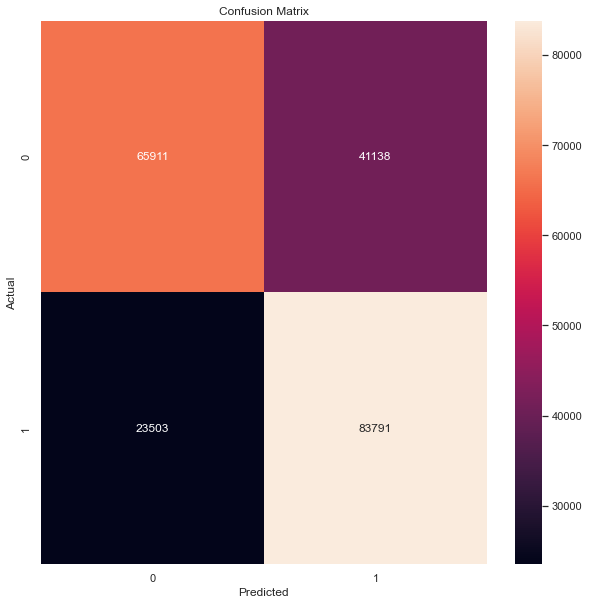

In [71]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

CLASSIFICATION REPORT

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67    107049
           1       0.67      0.78      0.72    107294

    accuracy                           0.70    214343
   macro avg       0.70      0.70      0.70    214343
weighted avg       0.70      0.70      0.70    214343



ROC CURVE

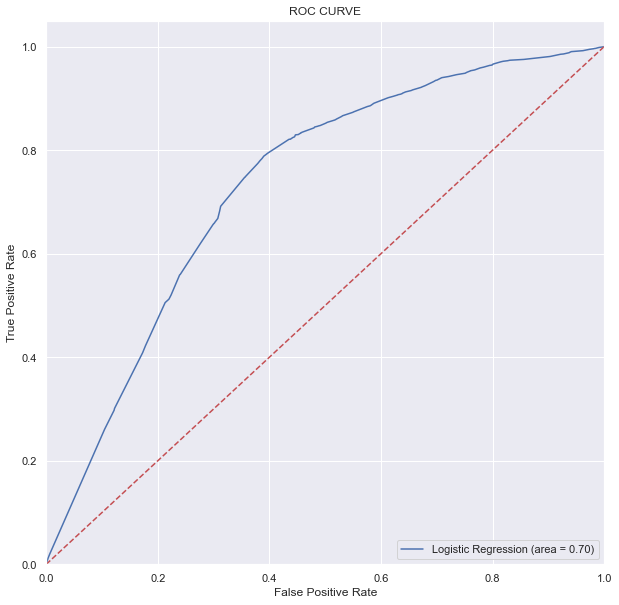

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

MACHNE LEARNING USING
DECISION TREE FOR RESEARCH QUESTION 2: ***What payment options do consumers prefer based on variables like item category, item price, etc***

CLEANING THE DATA AND REMOVING UNNECESSARY COLUMNS

In [ ]:
# Taking completed orders only for this model
df_new_2 = df.copy()
df_new_2 = df_new_2[df_new_2['Status'] == 'Complete']
df_new_2.reset_index(drop=True, inplace=True)
#dropping the columns that are not needed
df_new_2.drop(['Order_Date', 'Unit_Price', 'Quantity', 'Discount', 'Year', 'Month', 'Status'], axis = 1, inplace = True)
df_new_2.head()


Total_Price           Category Payment_Mode
0       1950.0    Women's Fashion          COD
1         60.0  Beauty & Grooming          COD
2         60.0  Beauty & Grooming          COD
3        170.0            Soghaat          COD
4       5500.0         Appliances          COD

ONE HOT ENCODING THE CATEGORICAL FEATURES FOR TRAINING THE MODEL USING DECISION TREE

In [ ]:
df_new_encoded = pd.get_dummies(df_new_2, columns = ['Category'])
df_new_encoded['Price'] = df_new_encoded['Total_Price'].apply(lambda x: 1 if x >= 8586.7 else 0) #creating a new column to classify orders as expensive or not
df_new_encoded.drop('Total_Price', axis = 1, inplace = True) #dropping the original Total_Price column
df_new_encoded.rename(columns = {'Price':'Expensive'}, inplace = True)
df_new_encoded.head()

Payment_Mode  Category_Appliances  Category_Beauty & Grooming  \
0          COD                    0                           0   
1          COD                    0                           1   
2          COD                    0                           1   
3          COD                    0                           0   
4          COD                    1                           0   

   Category_Books  Category_Computing  Category_Entertainment  \
0               0                   0                       0   
1               0                   0                       0   
2               0                   0                       0   
3               0                   0                       0   
4               0                   0                       0   

   Category_Health & Sports  Category_Home & Living  Category_Kids & Baby  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       0                     0   
4                         0                       0                     0   

   Category_Men's Fashion  Category_Mobiles & Tablets  Category_Others  \
0                       0                           0                0   
1                       0                           0                0   
2                       0                           0                0   
3                       0                           0                0   
4                       0                           0                0   

   Category_School & Education  Category_Soghaat  Category_Superstore  \
0                            0                 0                    0   
1                            0                 0                    0   
2                            0                 0                    0   
3                            0                 1                    0   
4                            0                 0                    0   

   Category_Women's Fashion  Expensive  
0                         1          0  
1                         0          0  
2                         0          0  
3                         0          0  
4                         0          0

TRAINING THE MODEL USING DECISION TREE AND PREDICTING THE VALUES FOR THE TEST DATASET

In [ ]:
from sklearn import tree
import graphviz 

X = df_new_encoded.loc[:, df_new_encoded.columns != 'Payment_Mode']
y = df_new_encoded.loc[:, df_new_encoded.columns == 'Payment_Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
decision_tree_model = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decision_tree_model.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.68


VISUALIZING THE DECISION TREE

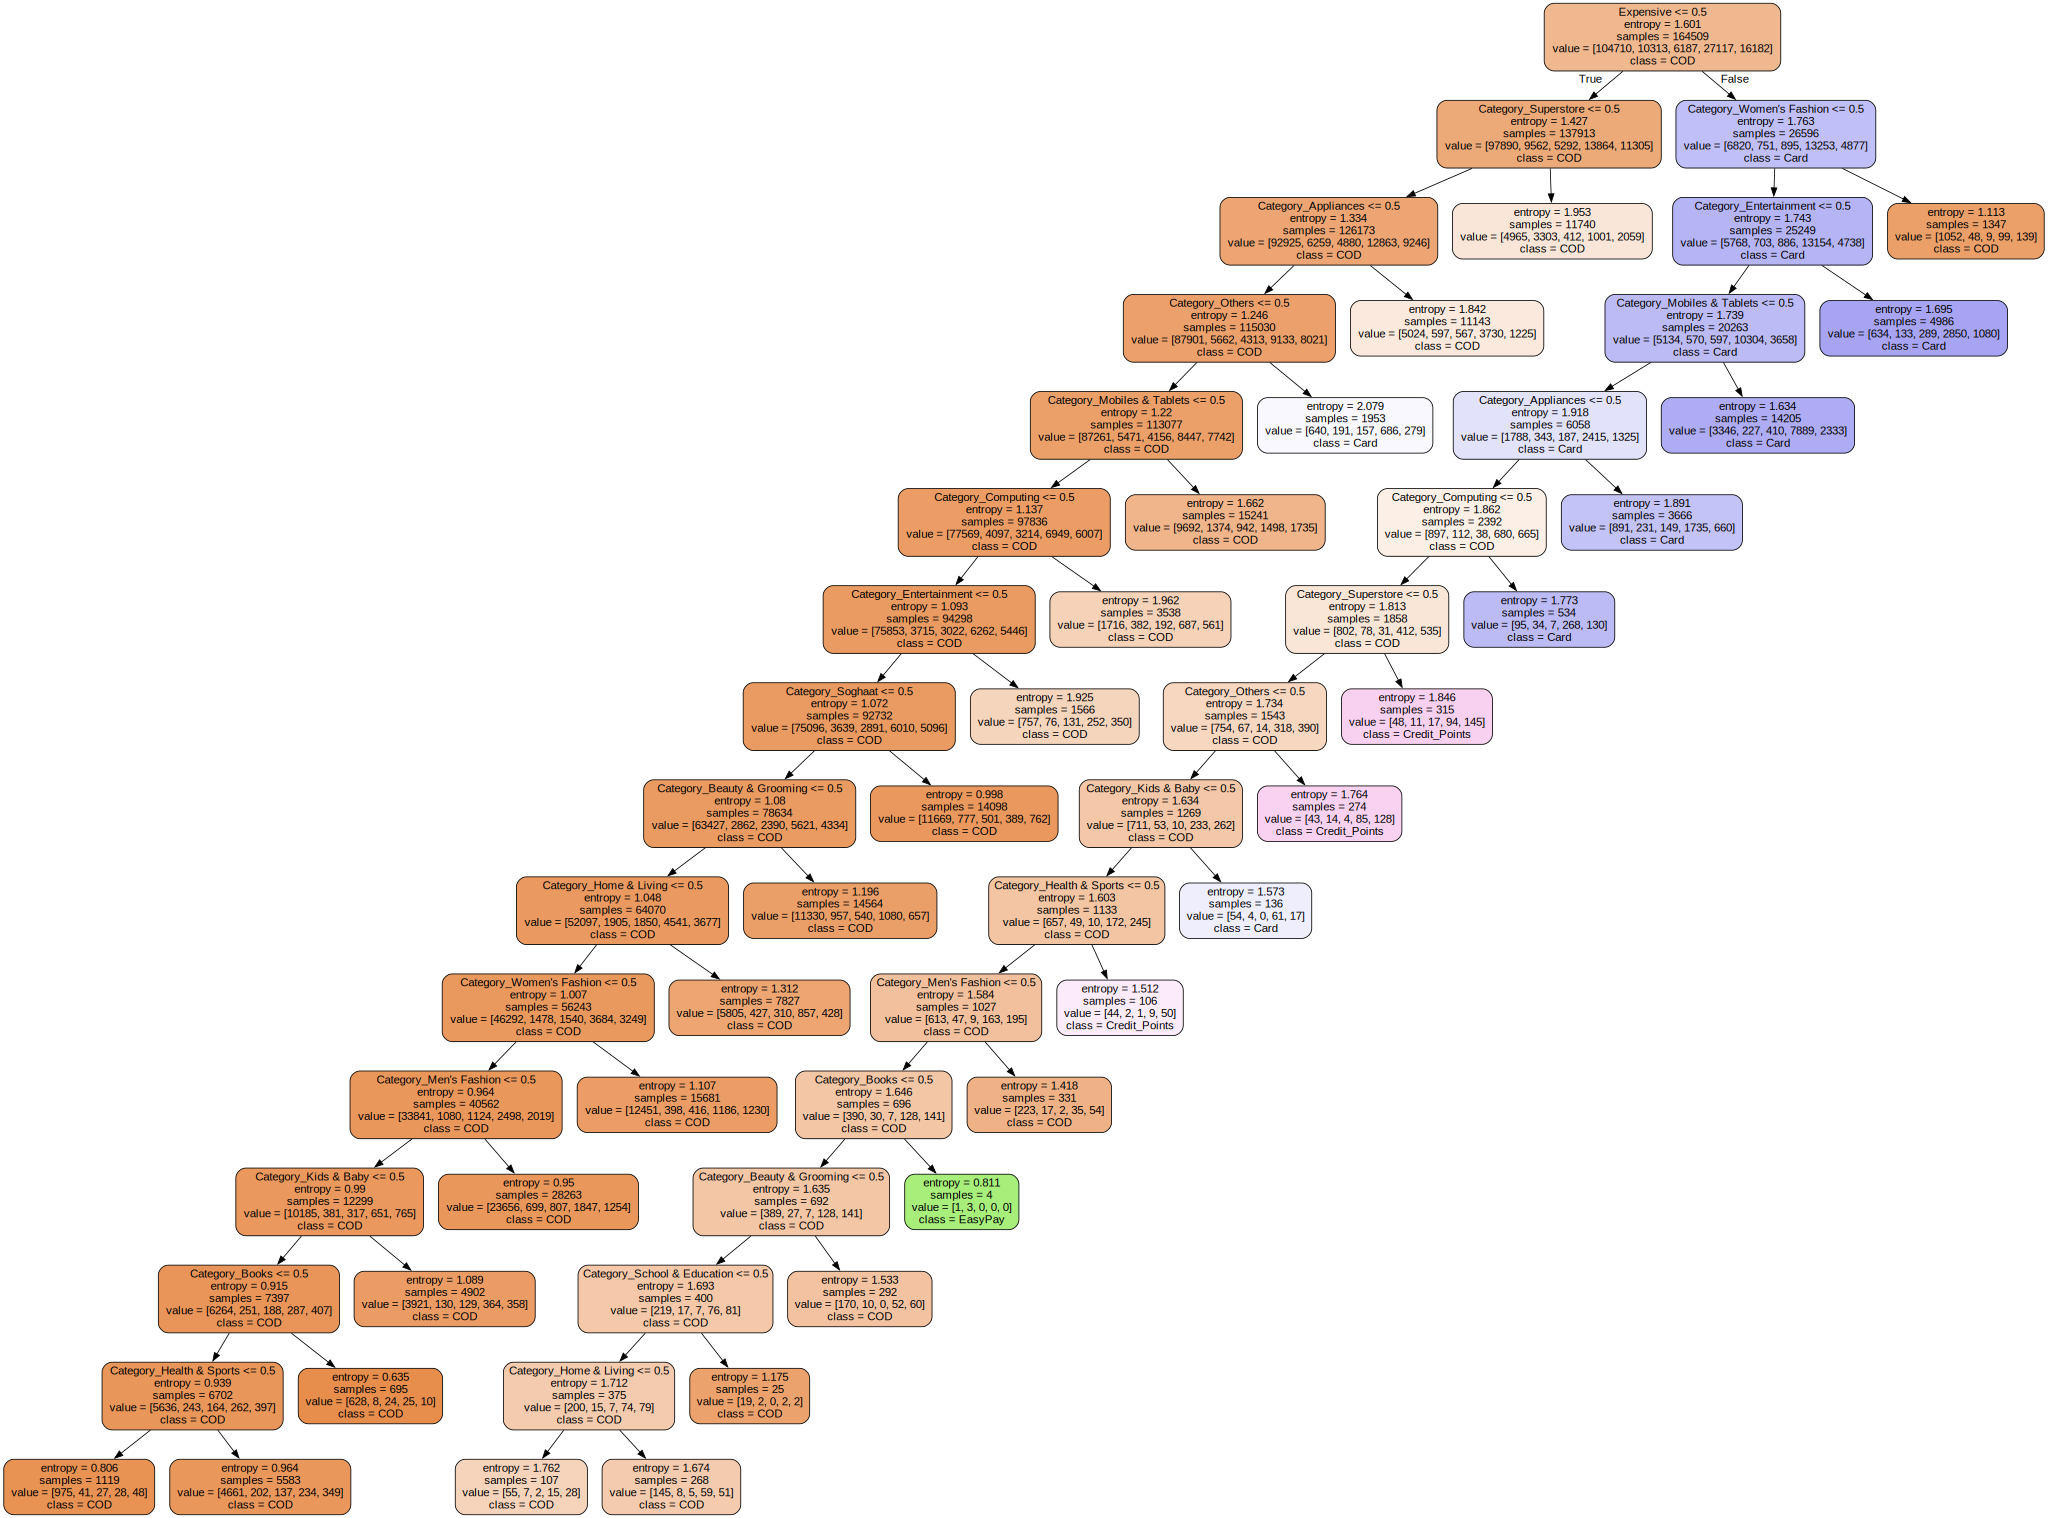

In [ ]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['COD', 'EasyPay', 'Other', 'Card', 'Credit_Points'],  
                      filled=True, rounded=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="decisiontree") 
graph

*******PROJECT FINISHED SUCCESSFULLY! :)*******